# Titanic DataSet.

[competition link](https://www.kaggle.com/c/titanic)


In [1]:
# import packages
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
competitions = pd.read_csv('../competitions.csv', dtype=str)
competitions

,index,ref,deadline,category,reward,teamCount,userHasEntered,competition_name
0,00001,https://www.kaggle.com/competitions/titanic,2030-01-01 00:00:00,Getting Started,Knowledge,15750,False,titanic


In [4]:
# Set the competition index
INDEX = '00001'
COMPETITION_NAME = competitions[competitions['index'] == INDEX]['competition_name'].values[0]
DATASET_PATH = f'../datasets/{INDEX}_{COMPETITION_NAME}/'

# Download the dataset

!rm -rf {DATASET_PATH}
!mkdir -p {DATASET_PATH}
!kaggle competitions download -c {COMPETITION_NAME} -p {DATASET_PATH}
!unzip {DATASET_PATH}*.zip  -d {DATASET_PATH}
!rm {DATASET_PATH}*.zip

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 4.57MB/s]
Archive:  ../datasets/00001_titanic/titanic.zip
  inflating: ../datasets/00001_titanic/gender_submission.csv  
  inflating: ../datasets/00001_titanic/test.csv  
  inflating: ../datasets/00001_titanic/train.csv  


In [5]:
# Train data analysis
train = pd.read_csv(f'{DATASET_PATH}/train.csv')
print(f"shape: {train.shape}")
print(f"columns: {json.dumps(train.columns.tolist(), indent=2)}")
train.head()

shape: (891, 12)
columns: [
  "PassengerId",
  "Survived",
  "Pclass",
  "Name",
  "Sex",
  "Age",
  "SibSp",
  "Parch",
  "Ticket",
  "Fare",
  "Cabin",
  "Embarked"
]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: title={'center': 'Survival Rate by Embarked'}, ylabel='Survived'>

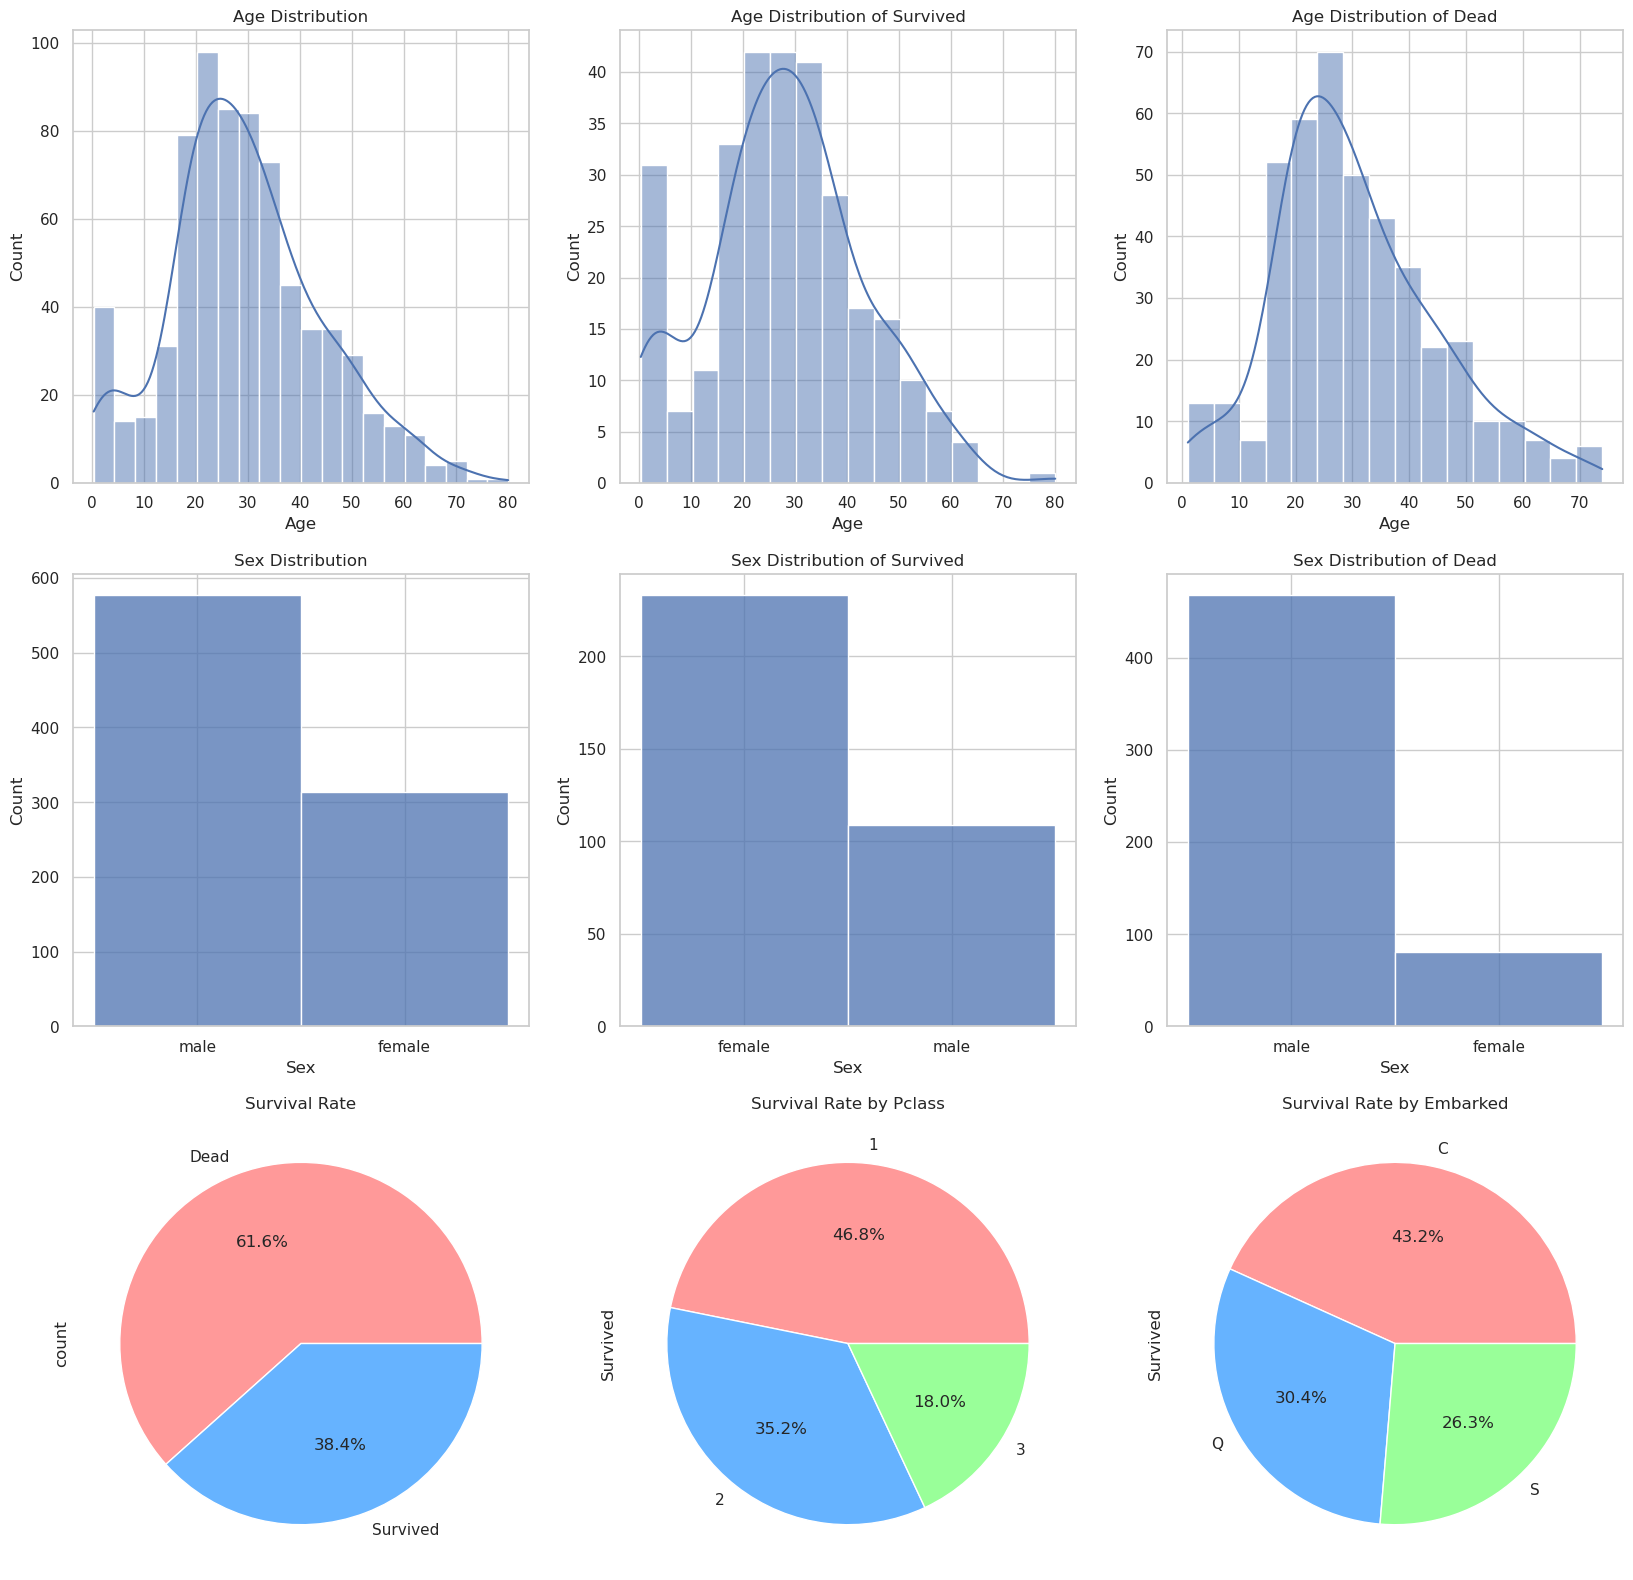

In [39]:
# 연령대별 분포
# 성별 분포
# 연령대별 생존자 수
# 성별 생존자 수
# 연령대별 사망자 수
# 성별 사망자 수
# 연령대별 생존율
# 성별 생존율

# 3x3 subplot 생성
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

# 연령대별 분포
sns.set_theme(style='whitegrid')
axes[0, 0].set_title('Age Distribution')
sns.histplot(data=train, x='Age', kde=True, ax=axes[0, 0])
# 연령대별 생존자 분포
axes[0, 1].set_title('Age Distribution of Survived')
sns.histplot(data=train[train['Survived'] == 1], x='Age', kde=True, ax=axes[0, 1])
# 연령대별 사망자 분포
axes[0, 2].set_title('Age Distribution of Dead')
sns.histplot(data=train[train['Survived'] == 0], x='Age', kde=True, ax=axes[0, 2])
# 성별 분포
axes[1, 0].set_title('Sex Distribution')
sns.histplot(data=train, x='Sex', kde=False, ax=axes[1, 0])
# 성별 생존자 분포
axes[1, 1].set_title('Sex Distribution of Survived')
sns.histplot(data=train[train['Survived'] == 1], x='Sex', kde=False, ax=axes[1, 1])
# 성별 사망자 분포
axes[1, 2].set_title('Sex Distribution of Dead')
sns.histplot(data=train[train['Survived'] == 0], x='Sex', kde=False, ax=axes[1, 2])
# 전체 생존율 Pie chart
axes[2, 0].set_title('Survival Rate')
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[2, 0], colors=['#ff9999', '#66b3ff'], labels=['Dead', 'Survived'])
# Pclass별 생존율 Pie chart
axes[2, 1].set_title('Survival Rate by Pclass')
train.groupby('Pclass')['Survived'].mean().plot.pie(autopct='%1.1f%%', ax=axes[2, 1], colors=['#ff9999', '#66b3ff', '#99ff99'], labels=['1', '2', '3'])
# Embarked별 생존율 Pie chart
axes[2, 2].set_title('Survival Rate by Embarked')
train.groupby('Embarked')['Survived'].mean().plot.pie(autopct='%1.1f%%', ax=axes[2, 2], colors=['#ff9999', '#66b3ff', '#99ff99'], labels=['C', 'Q', 'S'])